In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
enrol1=pd.read_csv('data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv')

In [13]:
enrol2 = pd.read_csv('data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv')


In [14]:
enrol3=pd.read_csv('data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv')

In [15]:
enrollment_combined = pd.concat([enrol1, enrol2, enrol3], ignore_index=True)

In [16]:
df=enrollment_combined.copy()

In [17]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [18]:
df.shape 
# there are total 500000 rows and 7 columns in the dataset

(1006029, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [20]:
df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


data cleaning

In [21]:
# Removing duplicate rows based on 'date' and 'pincode' columns
df = df.drop_duplicates(subset=["date", "pincode"], keep="first")

In [22]:
df.shape   
# there were 71493 duplicate rows. 
# So, after removing duplicates, there are 428507 rows remaining. (initially there were 500000 rows)

(868876, 7)

In [23]:
# Removing full duplicate rows
df = df.drop_duplicates(keep="first")

In [24]:
df.shape
# there were no full duplicate rows.

(868876, 7)

In [25]:
df.isna().sum()    # no missing values in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [26]:
(df == "").sum()  # no empty strings in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [27]:
(df == " ").sum() # no empty strings with space in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [28]:
(df.astype(str).apply(lambda x: x.str.strip() == "").sum()) # no empty strings with leading or trailing spaces in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [29]:
df[df["pincode"].astype(str).str.len() != 6]   # no invalid pincodes.

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater


In [30]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [31]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [32]:
df['state'].value_counts() # the state names arent consistent. 

state
Uttar Pradesh                                   101266
Tamil Nadu                                       83362
Maharashtra                                      68172
West Bengal                                      60741
Karnataka                                        55039
Bihar                                            53751
Rajasthan                                        53632
Andhra Pradesh                                   50436
Madhya Pradesh                                   45556
Gujarat                                          40788
Kerala                                           38275
Odisha                                           38209
Telangana                                        28659
Assam                                            27641
Jharkhand                                        19223
Punjab                                           18738
Haryana                                          14923
Chhattisgarh                                     14769
Hima

In [33]:
df['state_clean'] = df['state'].str.lower().str.strip().str.replace(r'[^a-z]', '', regex=True)

In [34]:
df['state_clean'].value_counts()

state_clean
uttarpradesh                            101266
tamilnadu                                83362
maharashtra                              68172
westbengal                               60759
karnataka                                55039
bihar                                    53751
rajasthan                                53632
andhrapradesh                            50437
madhyapradesh                            45556
gujarat                                  40788
kerala                                   38275
odisha                                   38210
telangana                                28659
assam                                    27641
jharkhand                                19223
punjab                                   18738
haryana                                  14923
chhattisgarh                             14769
himachalpradesh                           9988
jammuandkashmir                           9699
uttarakhand                               9478
d

In [35]:
valid_states = [
    "andhrapradesh","arunachalpradesh","assam","bihar","chhattisgarh",
    "goa","gujarat","haryana","himachalpradesh","jharkhand",
    "karnataka","kerala","madhyapradesh","maharashtra","manipur",
    "meghalaya","mizoram","nagaland","odisha","punjab",
    "rajasthan","sikkim","tamilnadu","telangana","tripura",
    "uttarpradesh","uttarakhand","westbengal",
    "jammuandkashmir","delhi"
]

In [36]:
import difflib

In [37]:
df['state_final'] = df['state_clean'].apply(
    lambda x: difflib.get_close_matches(x, valid_states, n=1, cutoff=0.75)[0]
    if difflib.get_close_matches(x, valid_states, n=1, cutoff=0.75)
    else x
)

In [38]:
df['state_final'].value_counts()

state_final
uttarpradesh                            101266
tamilnadu                                83362
maharashtra                              68172
westbengal                               60765
karnataka                                55039
bihar                                    53751
rajasthan                                53632
andhrapradesh                            50437
madhyapradesh                            45556
gujarat                                  40788
kerala                                   38275
odisha                                   38210
telangana                                28659
assam                                    27641
jharkhand                                19223
punjab                                   18738
haryana                                  14923
chhattisgarh                             14769
himachalpradesh                           9988
jammuandkashmir                           9786
uttarakhand                               9478
d

In [39]:
# fixing old names and merged UTs
df['state_final'] = df['state_final'].replace({
    "orissa": "odisha",
    "pondicherry": "puducherry",
    "andamannicobarislands": "andamanandnicobarislands",
    "damananddiu": "dadraandnagarhavelianddamananddiu",
    "damandiu": "dadraandnagarhavelianddamananddiu",
    "dadraandnagarhaveli": "dadraandnagarhavelianddamananddiu",
    "dadranagarhaveli": "dadraandnagarhavelianddamananddiu"
})
df['state_final'].value_counts()

state_final
uttarpradesh                            101266
tamilnadu                                83362
maharashtra                              68172
westbengal                               60765
karnataka                                55039
bihar                                    53751
rajasthan                                53632
andhrapradesh                            50437
madhyapradesh                            45556
gujarat                                  40788
odisha                                   39889
kerala                                   38275
telangana                                28659
assam                                    27641
jharkhand                                19223
punjab                                   18738
haryana                                  14923
chhattisgarh                             14769
himachalpradesh                           9988
jammuandkashmir                           9786
uttarakhand                               9478
d

In [40]:
df = df[df['state_final'].str.len() > 0]

In [41]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_clean,state_final
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,meghalaya,meghalaya
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,karnataka,karnataka
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,uttarpradesh,uttarpradesh
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,uttarpradesh,uttarpradesh
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,karnataka,karnataka


In [42]:
df = df[['date', 'state_final', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']]

In [43]:
df.head()

,date,state_final,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,meghalaya,793121,11,61,37
1,2025-03-09,karnataka,560043,14,33,39
2,2025-03-09,uttarpradesh,208001,29,82,12
3,2025-03-09,uttarpradesh,202133,62,29,15
4,2025-03-09,karnataka,560016,14,16,21


In [44]:
df['total_enrolments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

In [45]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month   
df['year'] = df['date'].dt.year

In [46]:
df.head()

,date,state_final,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,day,month,year
0,2025-03-02,meghalaya,793121,11,61,37,109,2,3,2025
1,2025-03-09,karnataka,560043,14,33,39,86,9,3,2025
2,2025-03-09,uttarpradesh,208001,29,82,12,123,9,3,2025
3,2025-03-09,uttarpradesh,202133,62,29,15,106,9,3,2025
4,2025-03-09,karnataka,560016,14,16,21,51,9,3,2025


In [47]:
# integrity check- does pincode match only one district??
df.groupby('pincode')['state_final'].nunique().max()
# np.int64(2). atleast one pincode maps to 2 states. 

np.int64(3)

In [48]:
bad_pincodes = df.groupby('pincode')['state_final'].nunique()
bad_pincodes = bad_pincodes[bad_pincodes > 1]
bad_pincodes

pincode
160003    2
160014    2
160055    2
160103    2
194101    2
         ..
756084    2
781129    2
781131    2
783123    2
783134    2
Name: state_final, Length: 606, dtype: int64

In [49]:
df[df['pincode'].isin(bad_pincodes.index)][['pincode', 'state_final']].sort_values('pincode')

,pincode,state_final
153612,160003,chandigarh
119427,160003,chandigarh
98360,160003,chandigarh
370289,160003,chandigarh
823102,160003,chandigarh
...,...,...
525647,783134,meghalaya
292047,783134,meghalaya
781,783134,meghalaya
2610,783134,assam


In [50]:
# fixing using majority state for those pincodes
for pin in bad_pincodes.index:
    correct_state = (df[df['pincode'] == pin]['state_final'].value_counts().idxmax())
    df.loc[df['pincode'] == pin, 'state_final'] = correct_state

In [51]:
df.groupby('pincode')['state_final'].nunique().max()  # fixed. 

np.int64(1)

In [52]:
df.head()  # data cleaning complete.

,date,state_final,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,day,month,year
0,2025-03-02,meghalaya,793121,11,61,37,109,2,3,2025
1,2025-03-09,karnataka,560043,14,33,39,86,9,3,2025
2,2025-03-09,uttarpradesh,208001,29,82,12,123,9,3,2025
3,2025-03-09,uttarpradesh,202133,62,29,15,106,9,3,2025
4,2025-03-09,karnataka,560016,14,16,21,51,9,3,2025


EDA & Visualization

In [53]:
df['total_enrolments'].describe()

count    868855.000000
mean          5.649732
std          33.652600
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3965.000000
Name: total_enrolments, dtype: float64

In [54]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Density Plot of Total Enrolments')

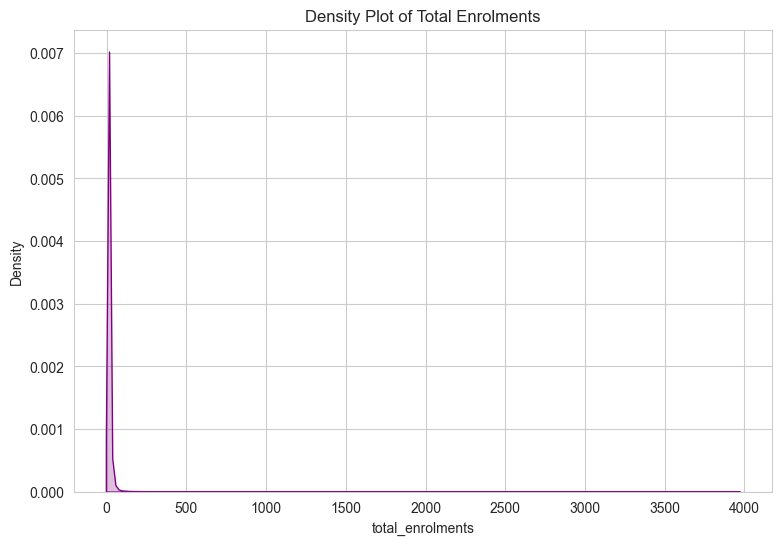

In [80]:
plt.figure(figsize=(9,6))
sns.kdeplot(df['total_enrolments'], fill=True, color = 'purple')
plt.title('Density Plot of Total Enrolments')

# Most areas have very low Aadhaar enrolments (1–5 people).
# A few areas show very high enrolments (100–300), which are important and meaningful events.
# The total enrolments decrease gradually as we move towards higher enrolment numbers.

In [56]:
# distribution of age groups
df[['age_0_5', 'age_5_17', 'age_18_greater']].describe()

# looking at the mean-- 
# Aadhaar enrolment is highest among children aged 0–5 years. This indicates that parents increasingly enrol infants early, 
# likely due to requirements for government schemes, healthcare benefits, and school admissions.
# Enrolments for the 5–17 age group are moderate and represent students completing Aadhaar for examinations, scholarships, and school records.
# the 18+ age group has the lowest daily enrolments, which aligns with real-world patterns because most adults already possess
# Aadhaar card.

,age_0_5,age_5_17,age_18_greater
count,868855.000000,868855.000000,868855.000000
mean,3.646673,1.821267,0.181792
std,18.771433,15.252595,3.314413
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,2688.000000,1549.000000,855.000000


Text(0, 0.5, 'Average Enrolments')

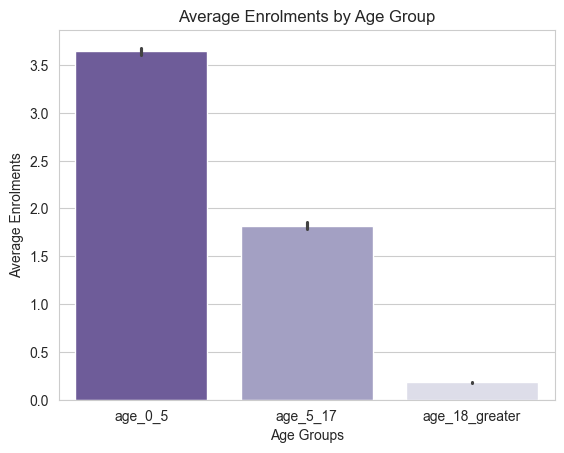

In [57]:
sns.barplot(df[['age_0_5', 'age_5_17', 'age_18_greater']], palette='Purples_r')
plt.title('Average Enrolments by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average Enrolments')

Text(0.5, 1.0, 'Daily Aadhaar Enrolments Over Time')

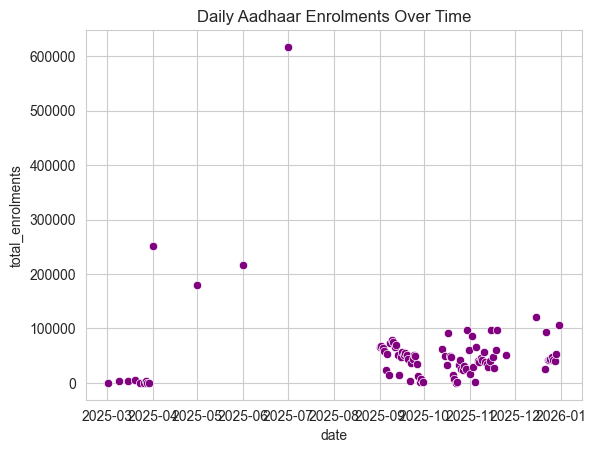

In [58]:
# How do daily enrolments change over time?
daily_enrolments = df.groupby('date')['total_enrolments'].sum().reset_index()
daily_enrolments = pd.DataFrame(daily_enrolments)
sns.scatterplot(data=daily_enrolments, x='date', y='total_enrolments', color='purple')
plt.title('Daily Aadhaar Enrolments Over Time')

# the Aadhaar enrolments show high variability with no clear upward or downward trend. 
# Certain days experience sharp spikes (peaking around mid-December), likely due to special enrolment drives or administrative events, 
# while some days show very low counts, possibly due to holidays or operational closures. 
# Overall, daily patterns are irregular rather than stable.

In [59]:
# monthly trend
monthly_enrolments = df.groupby(['month'])['total_enrolments'].sum().reset_index()
monthly_enrolments = pd.DataFrame(monthly_enrolments)
monthly_enrolments.sort_values('total_enrolments', ascending=False)

# most of the enrolments happened in the month of november, followed by december. least in october.

,month,total_enrolments
5,9,1328066
7,11,947631
6,10,695080
8,12,657555
4,7,616868
1,4,250743
3,6,215734
2,5,180539
0,3,16582


C:\Users\Mahi\AppData\Local\Temp\ipykernel_8112\3998486017.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = monthly_enrolments.sort_values(by='total_enrolments', ascending=False), x='month', y='total_enrolments', palette='Purples_r')


Text(0.5, 0, 'Month')

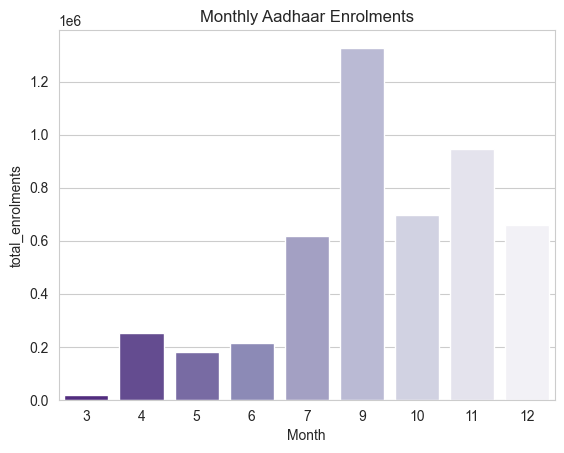

In [60]:
sns.barplot(data = monthly_enrolments.sort_values(by='total_enrolments', ascending=False), x='month', y='total_enrolments', palette='Purples_r')
plt.title('Monthly Aadhaar Enrolments')
plt.xlabel('Month')

In [61]:
# weekly trends
df['day_of_week'] = df['date'].dt.day_name()
weekly_enrolments = df.groupby('day_of_week')['total_enrolments'].sum().reset_index()
weekly_enrolments = pd.DataFrame(weekly_enrolments)
weekly_enrolments.sort_values('total_enrolments', ascending=False)

# most of the enrolments happened on Monday, followed by Wednesday and Sunday. Least on Saturday and Friday.

,day_of_week,total_enrolments
5,Tuesday,1350138
1,Monday,712627
6,Wednesday,665570
4,Thursday,660656
3,Sunday,570472
0,Friday,490400
2,Saturday,458935


C:\Users\Mahi\AppData\Local\Temp\ipykernel_8112\2035203257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = weekly_enrolments.sort_values(by='total_enrolments', ascending=False), y='day_of_week', x='total_enrolments', palette='Purples_r')


<Axes: xlabel='total_enrolments', ylabel='day_of_week'>

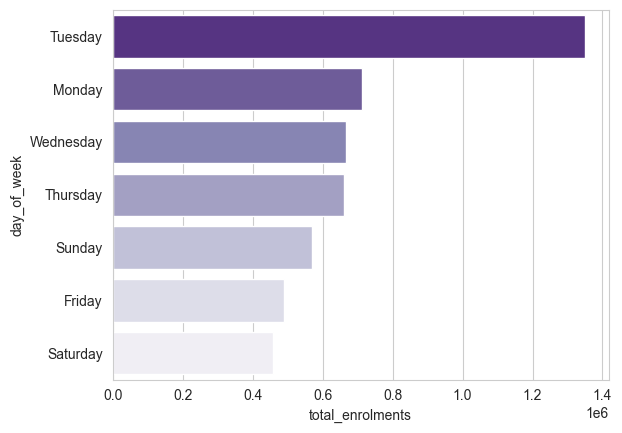

In [62]:
sns.barplot(data = weekly_enrolments.sort_values(by='total_enrolments', ascending=False), y='day_of_week', x='total_enrolments', palette='Purples_r')

In [63]:
# Which states have highest/lowest enrolments?
state_enrol = df.groupby('state_final')['total_enrolments'].sum().reset_index()
state_enrol = pd.DataFrame(state_enrol)
state_enrol = state_enrol.sort_values(by='total_enrolments', ascending=False)
state_enrol

# highest no. of enrolments in uttarpradesh, followed by madhya pradesh and bihar.
# least in andaman and nicobar islands, ladakh and lakshadweep.
# this aligns with population distribution patterns in India, where more populous states tend to have higher enrolment numbers.

,state_final,total_enrolments
34,uttarpradesh,966629
4,bihar,562276
19,madhyapradesh,463973
28,rajasthan,335475
20,maharashtra,334035
35,westbengal,308397
10,gujarat,258798
3,assam,213119
30,tamilnadu,200078
15,karnataka,181632


In [64]:
# Top and bottom 10 districts — who are they?
state_enrol.head(10)

,state_final,total_enrolments
34,uttarpradesh,966629
4,bihar,562276
19,madhyapradesh,463973
28,rajasthan,335475
20,maharashtra,334035
35,westbengal,308397
10,gujarat,258798
3,assam,213119
30,tamilnadu,200078
15,karnataka,181632


In [65]:
state_enrol.tail(10)

,state_final,total_enrolments
23,mizoram,5601
2,arunachalpradesh,3927
5,chandigarh,2420
9,goa,2264
26,puducherry,2029
29,sikkim,1677
7,dadraandnagarhavelianddamananddiu,1362
0,andamanandnicobarislands,449
18,lakshadweep,199
17,ladakh,186


C:\Users\Mahi\AppData\Local\Temp\ipykernel_8112\4157619719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_enrol, y='state_final', x='total_enrolments', palette='Purples_r')


Text(0.5, 1.0, 'Aadhaar Enrolments by State')

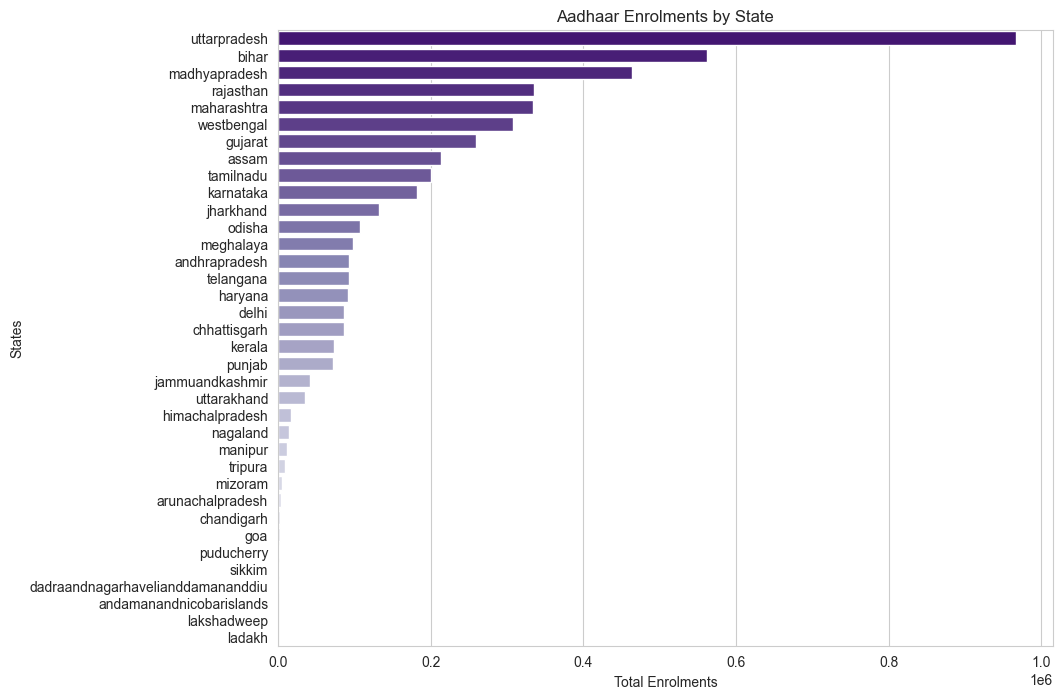

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(data=state_enrol, y='state_final', x='total_enrolments', palette='Purples_r')
plt.xlabel('Total Enrolments')
plt.ylabel('States')
plt.title('Aadhaar Enrolments by State')

In [67]:
# aadhar enrolments by state by age group
state_age_enrol = df.groupby('state_final')[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolments']].sum().reset_index()
state_age_enrol = pd.DataFrame(state_age_enrol)
state_age_enrol = state_age_enrol.sort_values(by='total_enrolments', ascending=False)
state_age_enrol

,state_final,age_0_5,age_5_17,age_18_greater,total_enrolments
34,uttarpradesh,492791,456659,17179,966629
4,bihar,239270,311396,11610,562276
19,madhyapradesh,344419,110351,9203,463973
28,rajasthan,221567,108474,5434,335475
20,maharashtra,251835,74697,7503,334035
35,westbengal,224705,76089,7603,308397
10,gujarat,176781,66328,15689,258798
3,assam,129799,61565,21755,213119
30,tamilnadu,165360,33571,1147,200078
15,karnataka,144431,28171,9030,181632


In [68]:
# Which pincodes show unusual behaviour
# outlier pincodes.
pincode_df = df.groupby('pincode')['total_enrolments'].sum().reset_index()
q1 = pincode_df['total_enrolments'].quantile(0.25)
q3 = pincode_df['total_enrolments'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
unusual_pincodes = pincode_df[(pincode_df["total_enrolments"] < lower_bound) | (pincode_df["total_enrolments"] > upper_bound)]
unusual_pincodes

# Pincodes with extremely high enrolments may indicate urban population hubs or large number of centres.
# Pincodes with extremely low enrolments may indicate rural areas or missing centres.

,pincode,total_enrolments
2,110003,780
4,110005,870
5,110006,889
6,110007,831
14,110015,818
...,...,...
19455,855108,1004
19456,855113,1700
19458,855115,762
19459,855116,793


In [69]:
unusual_pincodes.head()

,pincode,total_enrolments
2,110003,780
4,110005,870
5,110006,889
6,110007,831
14,110015,818


Text(0.5, 1.0, 'Aadhaar Enrolments for Age 0-5 Over Time')

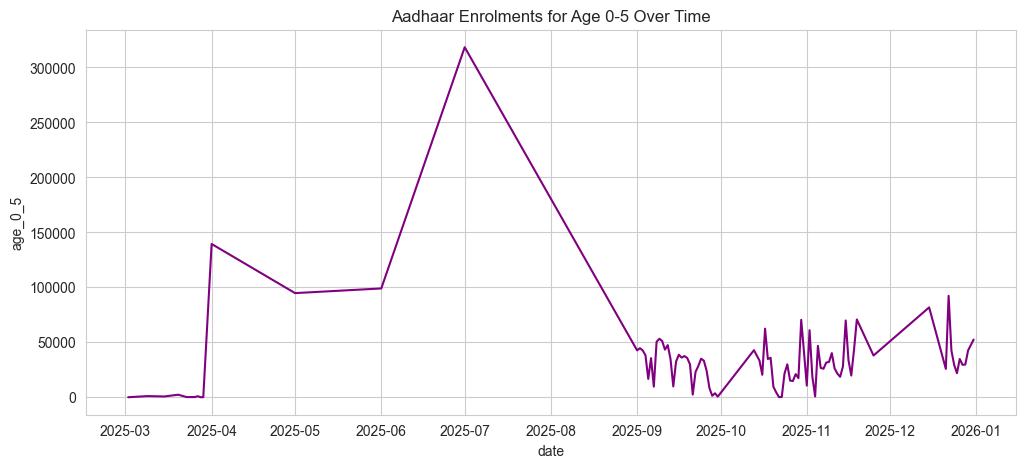

In [84]:
# Do 0–5 age registrations increase or decrease over time?
age_0_5_enrolments = df.groupby('date')['age_0_5'].sum().reset_index()
age_0_5_enrolments = pd.DataFrame(age_0_5_enrolments)
plt.figure(figsize=(12,5))
sns.lineplot(data=age_0_5_enrolments, x='date', y='age_0_5', color='purple')
plt.title('Aadhaar Enrolments for Age 0-5 Over Time')

# we cant say if there is an increase or decrease. the trend is irregular with spikes and dips.

In [71]:
# states with unusually high 18+ enrolments
unusual_18plus = (
    df.groupby("pincode")
      .agg({
          "age_18_greater": "sum",
          "state_final": "first",
      }).reset_index().sort_values("age_18_greater", ascending=False))
unusual_18plus.head(10)
# states in meghalaya, punjab, chhattisgarh, rajasthan, assam have unusually high 18+ enrolments.

,pincode,age_18_greater,state_final
17939,793119,2480,meghalaya
17940,793120,2063,meghalaya
17944,793150,1994,meghalaya
17941,793121,1926,meghalaya
17917,793015,1672,meghalaya
17945,793151,1241,meghalaya
17933,793110,1220,meghalaya
17948,793200,1192,meghalaya
17925,793102,1151,meghalaya
17928,793105,1051,meghalaya


In [72]:
# Which districts are strong in child enrolments

child_enrolments = df.groupby('pincode').agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'state_final': 'first'
}).reset_index().sort_values(by=['age_0_5', 'age_5_17'], ascending=False)
child_enrolments.head(10)

# districts in UP, MP, Delhi, Haryana, Maharashtra show strong child enrolments.

,pincode,age_0_5,age_5_17,state_final
2642,244001,10516,4443,uttarpradesh
57,110059,7297,2425,delhi
2811,247001,6963,2962,uttarpradesh
1619,202001,6142,5143,uttarpradesh
2679,244901,5817,3533,uttarpradesh
96,121004,5646,1397,haryana
2935,250002,5576,3493,uttarpradesh
6599,421302,5138,2538,maharashtra
2577,242001,4824,3543,uttarpradesh
7308,451666,4728,3460,madhyapradesh


<Axes: xlabel='date'>

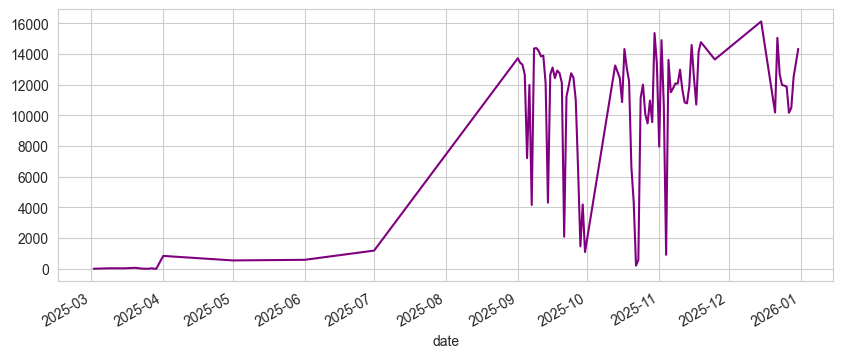

In [88]:
# Are there dates with sudden huge spikes
df['date'].value_counts().sort_index().plot(kind='line', color='purple', figsize=(10,4))

# Some dates have very high counts and some have very low counts. 
# This means the data was not added evenly every day — it was uploaded in batches. 
# Those dates are unusual and show abnormal activity.

In [74]:
# Are there pincodes with always-zero enrolments
zero_enrolment_pincodes = df.groupby('pincode')['total_enrolments'].sum().reset_index()
zero_enrolment_pincodes = zero_enrolment_pincodes[zero_enrolment_pincodes['total_enrolments'] == 0]
zero_enrolment_pincodes

# no such pincodes exist.

,pincode,total_enrolments


In [75]:
# pincodes missing from  a long time.
days_present = df.groupby('pincode')['date'].nunique()
total_days = df['date'].nunique()
days_absent = total_days - days_present
days_absent.sort_values(ascending=False).head()

pincode
847202    91
847123    91
844103    91
313338    91
403526    91
Name: date, dtype: int64

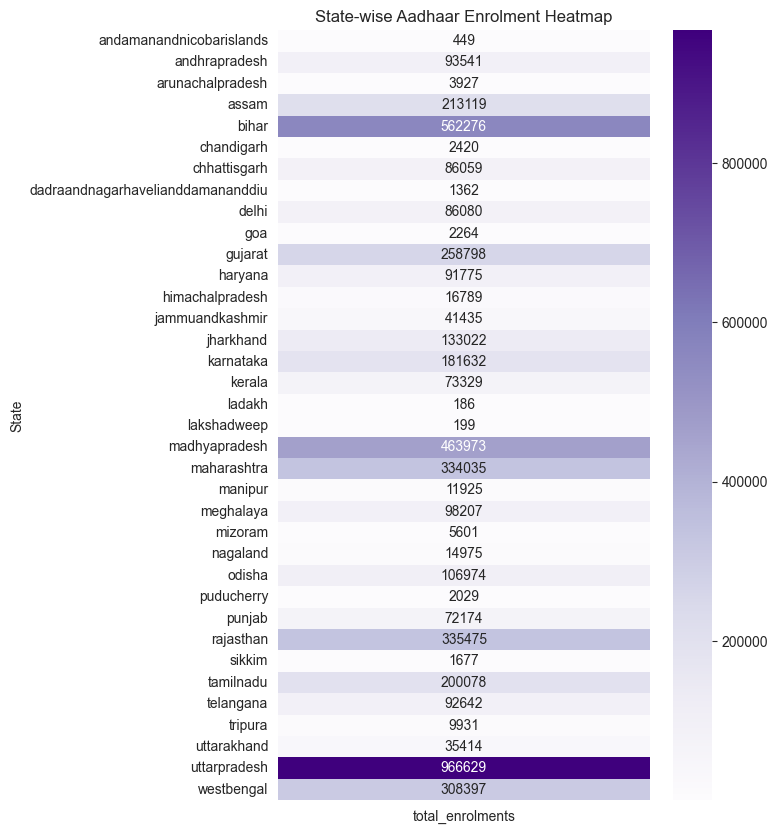

In [76]:
# state wise enrollment heatmap
state_data = df.groupby('state_final')['total_enrolments'].sum().reset_index()
heat = state_data.pivot_table(values='total_enrolments', index='state_final')
plt.figure(figsize=(6, 10))
sns.heatmap(heat, cmap="Purples", annot=True, fmt=".0f")
plt.title("State-wise Aadhaar Enrolment Heatmap")
plt.xlabel("")
plt.ylabel("State")
plt.show()

Text(0.5, 1.0, 'Overall Age Group Share in Aadhaar Enrolments')

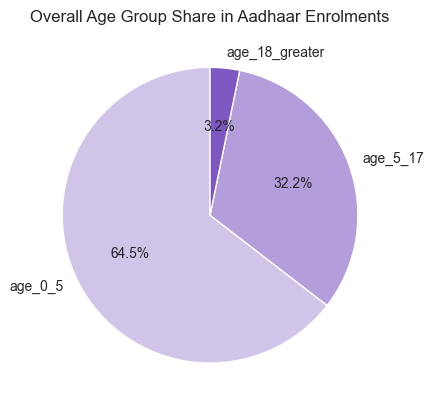

In [77]:
# Pie chart of overall age-group share.
age_group_totals = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
age_group_totals.plot.pie(autopct='%1.1f%%', colors=['#d1c4e9', '#b39ddb', '#7e57c2'], startangle=90)
plt.title('Overall Age Group Share in Aadhaar Enrolments')

In [89]:
df["date"] = pd.to_datetime(df["date"])

age_trend = (
    df.groupby("date")[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
    .reset_index()
)

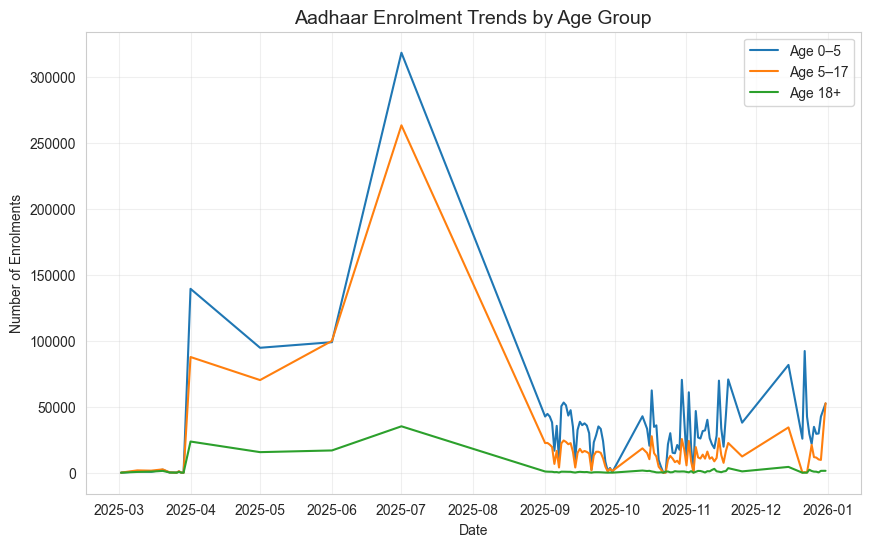

In [90]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=age_trend, x="date", y="age_0_5", label="Age 0–5")
sns.lineplot(data=age_trend, x="date", y="age_5_17", label="Age 5–17")
sns.lineplot(data=age_trend, x="date", y="age_18_greater", label="Age 18+")

plt.title("Aadhaar Enrolment Trends by Age Group", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Enrolments")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
